In [29]:
import numpy as np
import pandas as pd

from patsy import dmatrices, dmatrix
import re
import pickle
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

seed = 5
np.random.seed(seed)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
file = open('cleaned_cc_default_data', 'rb')
model_data = pickle.load(file)

# Splitting data into train/test & scaling

In [3]:
# Use Patsy to create my X Matrix
x_cols = ['age', 'sex', 'marital_status', 'education_level',  
        'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 
        'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
        'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 
         'limit_balance']

# # Add interactions
x_str = x_cols[0]
for i in x_cols[1:]:
    x_str = x_str + ' + ' + i
x_str = x_str + '' # if I want to create new variables, add in empty string

x_patsy = dmatrix(x_str, model_data)
x_patsy.shape


(2965, 24)

In [4]:
# Shuffle and then train/test split of my variables
# from sklearn.utils import shuffle

# x_raw = x_patsy
# y_raw = model_data['outcome_var']

#x_shuffle, y_shuffle = shuffle(x_raw, y_raw)
#x_mid, x_test, y_mid, y_test = train_test_split(x_shuffle, y_shuffle, test_size=0.2, random_state=0)
#x_train, x_val, y_train, y_val = train_test_split(x_mid, y_mid, test_size=0.25, random_state=0)

# Stratified train test split
x_raw = x_patsy
y_raw = np.array(model_data['default_payment_next_month'])

sss1 = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
# sss2 = StratifiedShuffleSplit(n_splits=2, test_size=0.25, random_state=0)

sss1.get_n_splits()
for train_index, test_index in sss1.split(x_raw, y_raw):
    x_train, x_test = x_raw[train_index,:], x_raw[test_index,:]
    y_train, y_test = y_raw[train_index], y_raw[test_index]

# use this later if I want to get fancy...
# sss2.get_n_splits()
# for train_index, test_index in sss2.split(x_mid, y_mid):
#     x_train, x_val = x_mid[train_index,:], x_mid[test_index,:]
#     y_train, y_val = y_mid[train_index], y_mid[test_index]

In [ ]:
X_test.shape

In [ ]:
x_train.shape


In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [5]:
# Normalize my variables
scaler = StandardScaler()
scaler.fit(x_train)
x_norm_train = scaler.transform(x_train)
# x_norm_val = scaler.transform(x_val)
x_norm_test = scaler.transform(x_test)

# Modeling Round I

- KNN
- Logistic Regression
- SVM
- Linear SVC
- Naive Bayes
- Decision Tree Classifier
- Random Forest
- XGBoost ?
- LightGBM ?
- Neural Net ?

In [6]:
# Helper function for printing confusion matrices (see: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823)

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

### KNN GridSearchCV

In [7]:
# Run CV with 5 folds (knn)

ks = range(1,301,50)
param_grid = [{'n_neighbors': ks}]

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
knn_grid.fit(x_norm_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    5.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_neighbors': range(1, 301, 50)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [8]:
# this is my best model based on above
# can run .predict(x_test)

knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=201, p=2,
           weights='uniform')

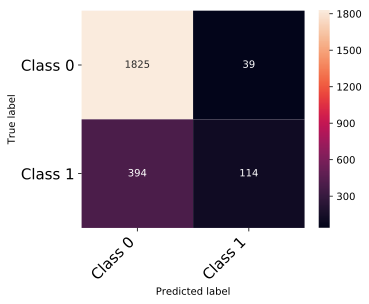

In [9]:
cm = print_confusion_matrix(confusion_matrix(y_train, knn_grid.predict(x_norm_train)), ['Class 0', 'Class 1'], figsize=(5, 4), fontsize=15)

### Logistic Regression GridSearchCV

In [10]:
# Run CV with 5 folds (logit)

penalty = ['l1', 'l2']
C = np.logspace(-3, 1, 100)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='liblinear', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(x_norm_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1870s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0466s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 331 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 507 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 715 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    8.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-03, 1.09750e-03, ..., 9.11163e+00, 1.00000e+01]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [11]:
# best model for logistic regression (metric = C)

logistic_grid.best_estimator_

LogisticRegression(C=0.02848035868435802, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

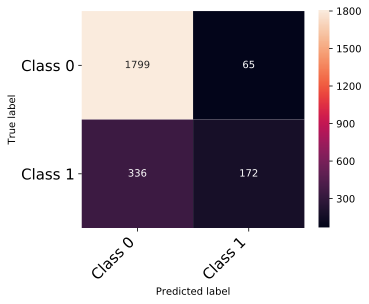

In [12]:
cm = print_confusion_matrix(confusion_matrix(y_train, logistic_grid.predict(x_norm_train)), ['Class 0', 'Class 1'], figsize=(5, 4), fontsize=15)

In [ ]:
# print coefficients
# then get coefficients
# those coefficients will tell me which features are most important
# purpose of this is interpretation of what really contributed to my model (presentation)

logistic2 = linear_model.LogisticRegression(C=0.02848035868435802, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) # ADD PARAMETERS FROM BEST ESTIMATE
logistic2.fit(x_norm_train, y_train)

In [ ]:
a = logistic2.coef_
a_list = a.tolist()
flat_list = [item for x in a_list for item in x]
a_df = pd.DataFrame(flat_list)
a_df

In [ ]:
b = x_cols
b_df = pd.DataFrame(b)
b_df

In [ ]:
logistic_coef = pd.concat([b_df, a_df], ignore_index = True, axis = 1)
logistic_coef

# list(zip(a,b))

In [ ]:
# because ROC-AUC scores between logit and RF are so close, can just opt to use logit since it will get rid of features (becuase it chose l1)
# or if I decide to use RF, can then do EDA on features of low importance to inuit which features are important vs. not and why

### SVM GridSearchCV

In [13]:
# Run CV with 5 folds (SVM)

C = np.logspace(-3, 1, 25)
gammas = np.logspace(-3, 0, 25)
param_grid = dict(C=C, gamma=gammas)

svm1 = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(x_norm_train, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-03, 1.46780e-03, 2.15443e-03, 3.16228e-03, 4.64159e-03,
       6.81292e-03, 1.00000e-02, 1.46780e-02, 2.15443e-02, 3.16228e-02,
       4.64159e-02, 6.81292e-02, 1.00000e-01, 1.46780e-01, 2.15443e-01,
       3.16228e-01, 4.64159e-01, 6.81292e-01, 1.00000e+00, 1.46780e..., 0.07499, 0.1    , 0.13335, 0.17783, 0.23714, 0.31623,
       0.4217 , 0.56234, 0.74989, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [14]:
svm_grid.best_estimator_

SVC(C=0.21544346900318823, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

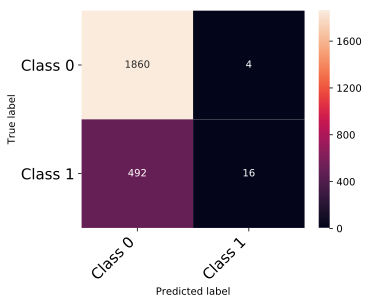

In [15]:
cm = print_confusion_matrix(confusion_matrix(y_train, svm_grid.predict(x_norm_train)), ['Class 0', 'Class 1'], figsize=(5, 4), fontsize=15)

### Linear SVC

IS THE CODE CORRECT?

HOW TO ADD TO ROC/AUC/SCORING?

In [16]:
# Run CV with 5 folds (Linear SVC)

C = np.logspace(-3, 1, 25)
# gammas = np.logspace(-3, 0, 25)
param_grid = dict(C=C)
# param_grid = dict(C=C, gamma=gammas)


# LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
#      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
#      multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

svc1 = LinearSVC()
svc_grid = GridSearchCV(svc1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svc_grid.fit(x_norm_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1842s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0800s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  92 out of 125 | elapsed:    6.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-03, 1.46780e-03, 2.15443e-03, 3.16228e-03, 4.64159e-03,
       6.81292e-03, 1.00000e-02, 1.46780e-02, 2.15443e-02, 3.16228e-02,
       4.64159e-02, 6.81292e-02, 1.00000e-01, 1.46780e-01, 2.15443e-01,
       3.16228e-01, 4.64159e-01, 6.81292e-01, 1.00000e+00, 1.46780e+00,
       2.15443e+00, 3.16228e+00, 4.64159e+00, 6.81292e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [17]:
svc_grid.best_estimator_

LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

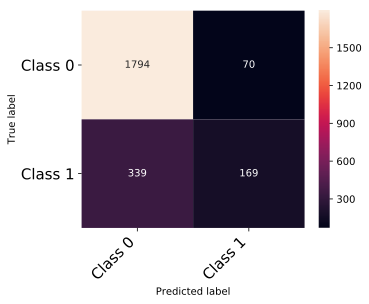

In [18]:
cm = print_confusion_matrix(confusion_matrix(y_train, svc_grid.predict(x_norm_train)), ['Class 0', 'Class 1'], figsize=(5, 4), fontsize=15)

### Naive Bayes Model

In [19]:
# Fit a Naive Bayes Model

gnb = GaussianNB()
gnb_best = gnb.fit(x_norm_train, y_train)

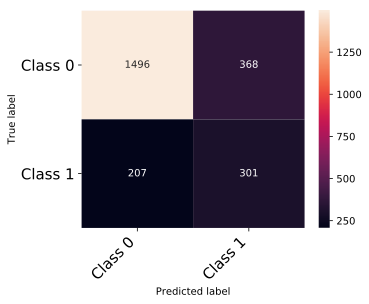

In [20]:
cm = print_confusion_matrix(confusion_matrix(y_train, gnb_best.predict(x_norm_train)), ['Class 0', 'Class 1'], figsize=(5, 4), fontsize=15)

### Decision Tree Classifier GridSearchCV

CORRECT CODE BELOW?

ADD TO ROC-AUC & SCORING

In [21]:
# Run CV with 5 folds (Decision Tree Classifier)

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, None],
    'max_features': ['sqrt'], # what is this?
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 3, 5, 10],
    'n_estimators': [100, 200, 400, 1000]
}

dectree = DecisionTreeClassifier()
dectree_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
dectree_grid.fit(x_norm_train, y_train)

NameError: name 'rf' is not defined

In [ ]:
dectree_grid.best_estimator_

In [ ]:
cm = print_confusion_matrix(confusion_matrix(y_train, dectree_grid.predict(x_norm_train)), ['Class 0', 'Class 1'], figsize=(5, 4), fontsize=15)

### Random Forest GridSearchCV

In [22]:
# Run CV with 5 folds (Random Forest)

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, None],
    'max_features': ['sqrt'], # what is this?
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 3, 5, 10],
    'n_estimators': [100, 200, 400, 1000]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(x_norm_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [50, 100, None], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 3, 5, 10], 'n_estimators': [100, 200, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [23]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

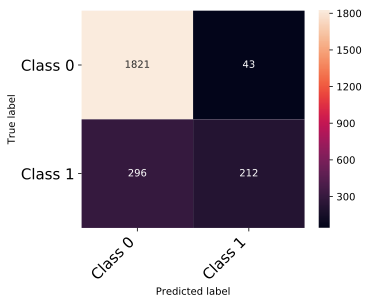

In [24]:
cm = print_confusion_matrix(confusion_matrix(y_train, rf_grid.predict(x_norm_train)), ['Class 0', 'Class 1'], figsize=(5, 4), fontsize=15)

In [25]:
# Random Forest Feature Importances

rf2 = RandomForestRegressor(n_estimators=200, max_depth = None)
rf2.fit(x_norm_train, y_train)
rf2.feature_importances_

array([0.        , 0.07760334, 0.01094099, 0.01437024, 0.02089924,
       0.05410274, 0.03904827, 0.03732308, 0.03867984, 0.0425945 ,
       0.04510076, 0.18936385, 0.01159394, 0.02475622, 0.0126196 ,
       0.00834618, 0.00892063, 0.04952861, 0.04767406, 0.0538761 ,
       0.04399339, 0.04685022, 0.05903159, 0.06278262])

In [27]:
# zip each feature importance weight with my columns

pd.DataFrame(zip(list(rf2.feature_importances_), model_data.columns)) # sort by 0 later

,0,1
0,0.000000,default_payment_next_month
1,0.077603,age
2,0.010941,sex
3,0.014370,marital_status
4,0.020899,education_level
5,0.054103,bill_amt_1
6,0.039048,bill_amt_2
7,0.037323,bill_amt_3
8,0.038680,bill_amt_4
9,0.042594,bill_amt_5


### Gradient Boosting Classifier GridSearchCV

In [30]:
parameter_grid={
    "loss":["deviance"],
    "learning_rate": [0.05, 0.075, 0.1],
    "min_samples_split": np.linspace(0.01, 0.1, 6),
    "min_samples_leaf": np.linspace(0.1, 0.5, 6),
    "max_depth":[10,20],
    "max_features":["sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[ 1.0],
    "n_estimators":[125]
    }
gbc_grid = GridSearchCV(GradientBoostingClassifier(), parameter_grid, cv=5, n_jobs=-1,scoring = 'roc_auc', verbose= True)
gbc_grid.fit(x_norm_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 1039 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 1517 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 2067 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 31.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'loss': ['deviance'], 'learning_rate': [0.05, 0.075, 0.1], 'min_samples_split': array([0.01 , 0.028, 0.046, 0.064, 0.082, 0.1  ]), 'min_samples_leaf': array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 ]), 'max_depth': [10, 20], 'max_features': ['sqrt'], 'criterion': ['friedman_mse', 'mae'], 'subsample': [1.0], 'n_estimators': [125]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

### XGBoost

In [ ]:
# run later and do feature importances

### LightGBM

### Neural Net?

### Scoring the models

#### ROC_AUC

In [ ]:
print('Best ROC_AUC for knn: %0.4f' % knn_grid.best_score_)
print('Best ROC_AUC for logit: %0.4f' % logistic_grid.best_score_)
print('Best ROC_AUC for svm: %0.4f' % svm_grid.best_score_)
print('Best ROC_AUC for rf: %0.4f' % rf_grid.best_score_)

#### F1

In [ ]:
# score on F1

# from sklearn.metrics import f1_score

# y_true = 
# y_pred = 

# f1_score(y_true, y_pred, average='macro')  

# f1_score(y_true, y_pred, average='micro')  

# f1_score(y_true, y_pred, average='weighted')  

# f1_score(y_true, y_pred, average=None)


#### Best parameters

In [ ]:
print('Best Params for knn: ', knn_grid.best_params_)
print('Best Patams for logit: ', logistic_grid.best_params_)
print('Best Params for svm: ', svm_grid.best_params_)
print('Best Params for rf: ', rf_grid.best_params_)

#### NOTE QUESTIONS IN BELOW COMMENTED CODE

In [ ]:
# ROC for all the models

# ARE THE X/Y VARIABLES THE CORRECT ONES TO USE HERE?
# How does the ensembe work?

# How to add new models above into this? E.g., Linear SVC, 

model_list = [knn_grid.best_estimator_, 
              logistic_grid.best_estimator_, 
              svm_grid.best_estimator_, 
              gnb_best, 
              rf_grid.best_estimator_,
              'ensemble']
model_name = ['knn', 'logit', 'svm', 'n_bayes', 'random_forest', 'ensemble']

# Plot ROC curve for all my models
fig, ax = plt.subplots(figsize=(10,8))
for i, model in enumerate(model_list):
    if model == 'ensemble':
        w1 = 0.10
        w2 = 0.80
        y_pred = (w1*logistic_grid.best_estimator_.predict_proba(x_norm_test)[:,1] 
                  + w2*rf_grid.best_estimator_.predict_proba(x_norm_test)[:,1]
                  + (1-w1-w2)*gnb_best.predict_proba(x_norm_test)[:,1])
    else:
        y_pred = list(model.predict_proba(x_norm_test)[:,1])
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc))

plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()